<a href="https://colab.research.google.com/github/hrcn81/commonplace/blob/main/LinearRegression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Algos/data_for_lr.csv")

In [7]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [8]:
data.columns

Index(['x', 'y'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [22]:
data.shape

(700, 2)

In [14]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [19]:
data.isnull().sum()

x    0
y    1
dtype: int64

# Data Processing

In [23]:
data = data.dropna()

In [24]:
data.shape

(699, 2)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# Splitting Data

In [28]:
# trainning input
train_input = np.array(data.x[0:500]).reshape(500,-1)

In [39]:
print(train_input[0:5])
print(train_input.shape)

[[24.]
 [50.]
 [15.]
 [38.]
 [87.]]
(500, 1)


In [31]:
# trainning output
train_output = np.array(data.y[0:500]).reshape(500,-1)

In [40]:
print(train_output[0:5])
print(train_output.shape)

[[21.54945196]
 [47.46446305]
 [17.21865634]
 [36.58639803]
 [87.28898389]]
(500, 1)


In [67]:
# Validation data input
test_input = np.array(data.x[500:699]).reshape(199,-1)
print(test_input[0:5])
print(test_input.shape)

[[ 5.]
 [61.]
 [47.]
 [98.]
 [30.]]
(199, 1)


In [68]:
# Validation data output
test_output = np.array(data.y[500:700]).reshape(199,-1)
print(test_output[0:5])
print(test_output.shape)

[[ 7.68202459]
 [61.01858089]
 [53.60562216]
 [94.47728801]
 [27.9645947 ]]
(199, 1)


In [71]:
print(f'Training Input :  {train_input.shape}')
print(f'Training Output:  {train_output.shape}')
print(f'Testing Input  :  {test_input.shape}')
print(f'Testing Output :  {test_output.shape}')

Training Input :  (500, 1)
Training Output:  (500, 1)
Testing Input  :  (199, 1)
Testing Output :  (199, 1)


# Linear Regression

### Forward Propogation



f(x) = m*x + c

In [73]:
def forward_propagation(train_input,parameters):
  m = parameters['m']
  c = parameters['c']

  predictions = np.multiply(m,train_input) + c
  return predictions

### Cost Function

summation(1/2n * (y - f(x))^2)

In [75]:
def cost_function(predictions,train_output):
  cost = np.mean((train_output - predictions)**2)*0.5

  return cost_function

### Gradient Descent for Backpropagation

*   df = summation(f(x) - y) / n

*   dm = df * x
*   dc = df * 1






In [77]:
def backward_propagation(train_input,train_output,predictions):
  derivatives = dict()

  df = predictions - train_output
  dm = np.mean(np.multiply(df,train_input))
  dc = np.mean(df)

  derivatives['dm'] = dm
  derivatives['dc'] = dc

  return derivatives

### Update Parameters

m = m - (learning_rate * dm)

c = c - (learning_rate * dc)

In [78]:
def update_parameters(parameters,derivatives,learning_rate):
  parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
  parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

  return parameters

# Model Training

In [120]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    #loss
    loss = list()

    #iterate
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

# Training

Iteration = 1, Loss = <function cost_function at 0x7f7a363756c0>


<Figure size 640x480 with 0 Axes>

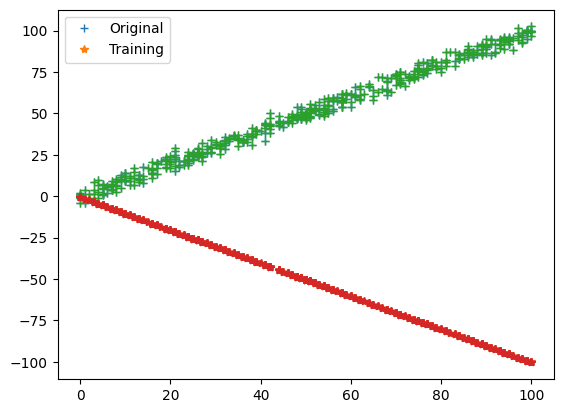

Iteration = 2, Loss = <function cost_function at 0x7f7a363756c0>


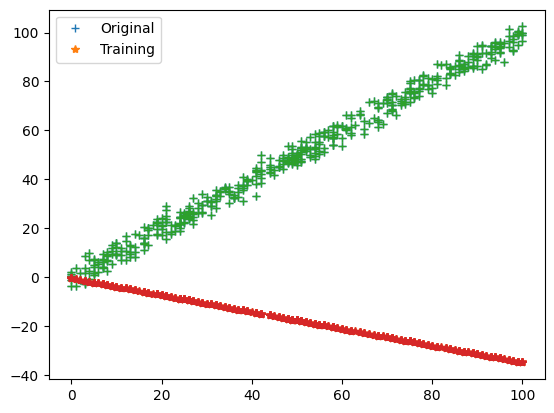

Iteration = 3, Loss = <function cost_function at 0x7f7a363756c0>


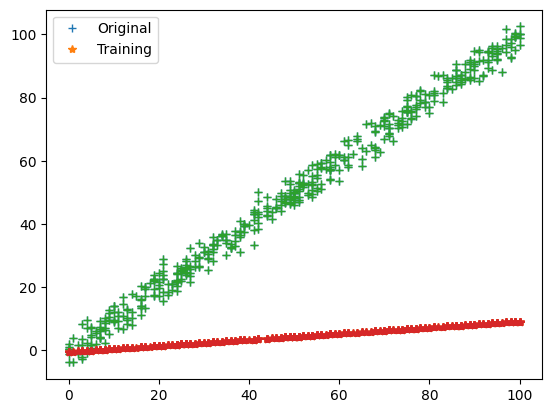

Iteration = 4, Loss = <function cost_function at 0x7f7a363756c0>


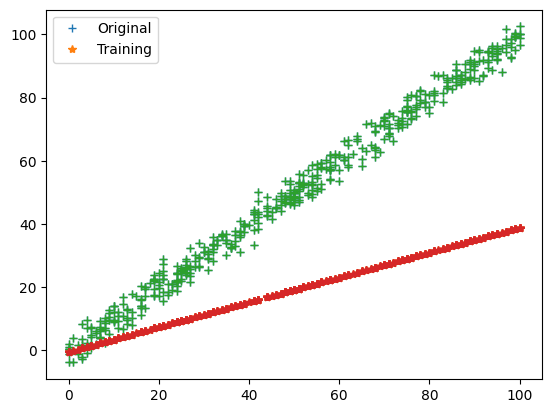

Iteration = 5, Loss = <function cost_function at 0x7f7a363756c0>


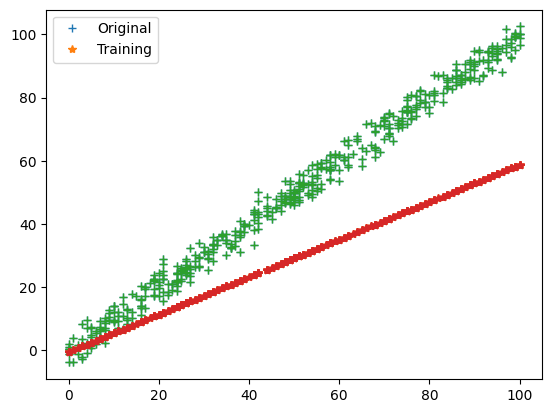

Iteration = 6, Loss = <function cost_function at 0x7f7a363756c0>


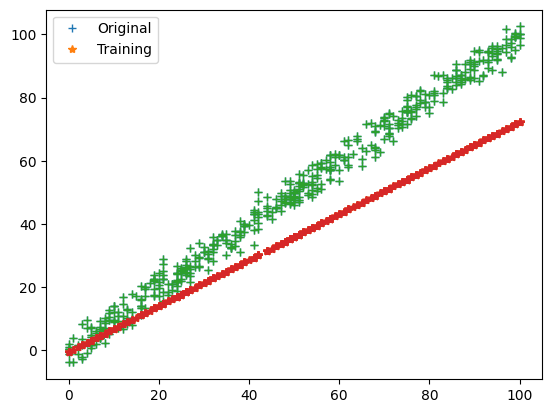

Iteration = 7, Loss = <function cost_function at 0x7f7a363756c0>


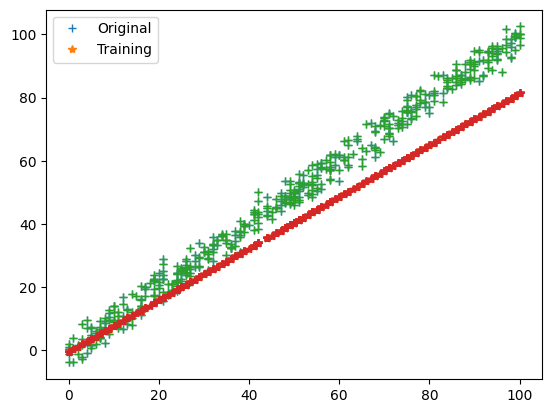

Iteration = 8, Loss = <function cost_function at 0x7f7a363756c0>


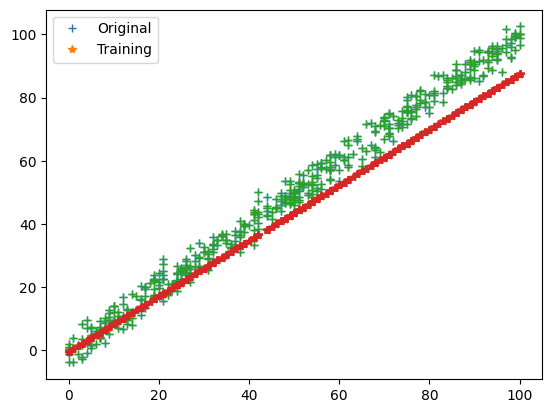

Iteration = 9, Loss = <function cost_function at 0x7f7a363756c0>


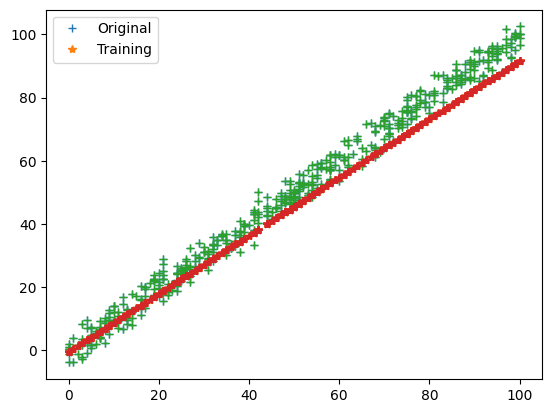

Iteration = 10, Loss = <function cost_function at 0x7f7a363756c0>


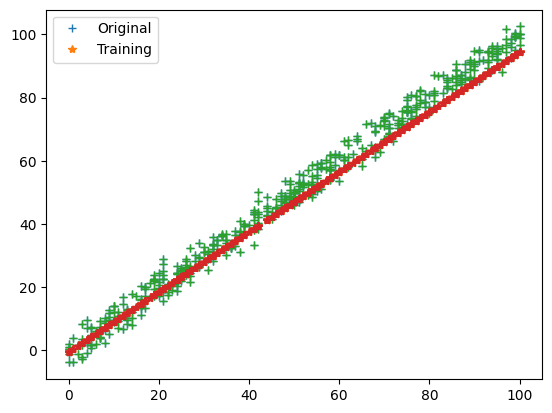

Iteration = 11, Loss = <function cost_function at 0x7f7a363756c0>


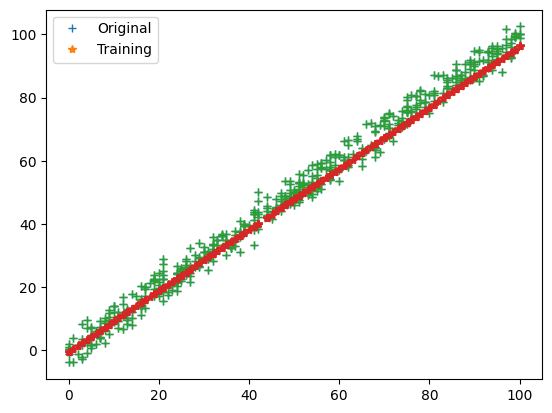

Iteration = 12, Loss = <function cost_function at 0x7f7a363756c0>


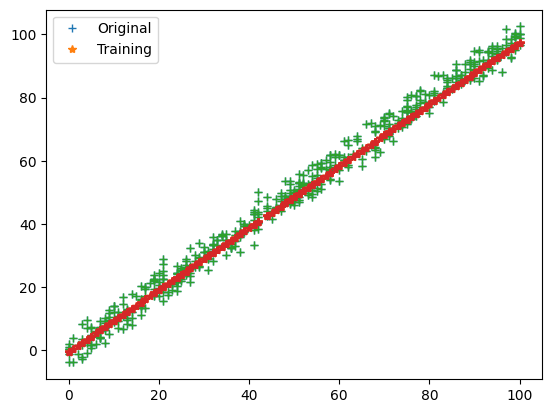

Iteration = 13, Loss = <function cost_function at 0x7f7a363756c0>


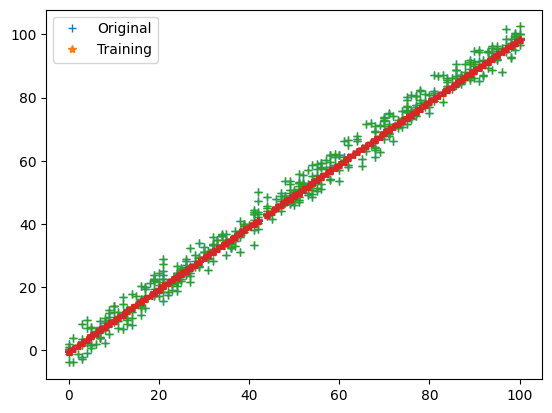

Iteration = 14, Loss = <function cost_function at 0x7f7a363756c0>


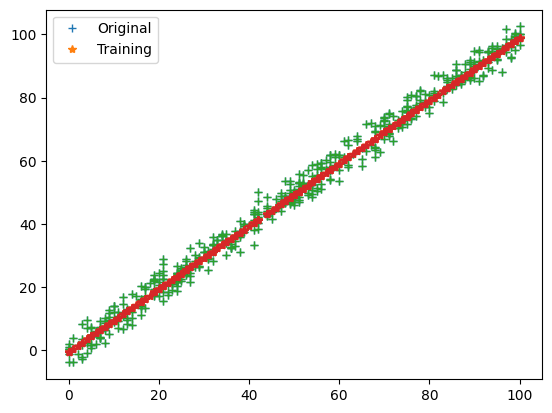

Iteration = 15, Loss = <function cost_function at 0x7f7a363756c0>


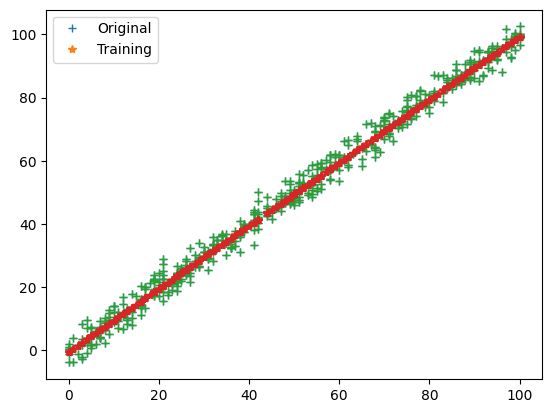

Iteration = 16, Loss = <function cost_function at 0x7f7a363756c0>


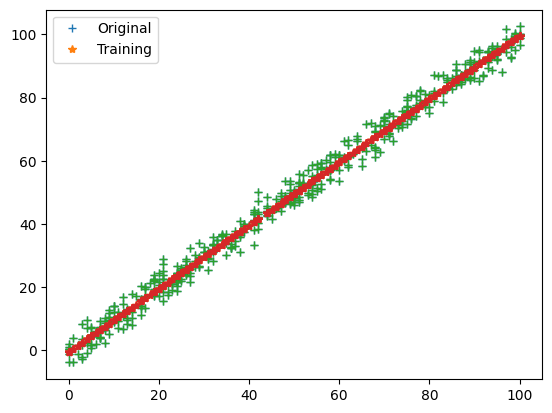

Iteration = 17, Loss = <function cost_function at 0x7f7a363756c0>


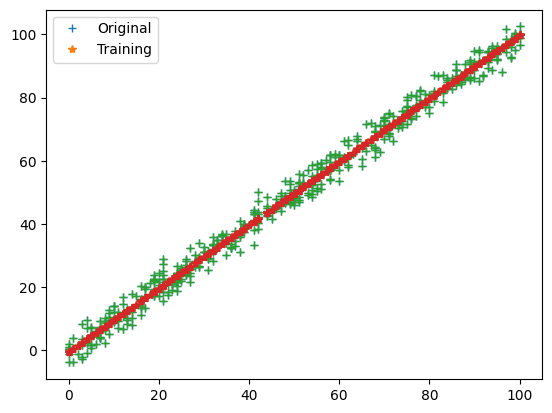

Iteration = 18, Loss = <function cost_function at 0x7f7a363756c0>


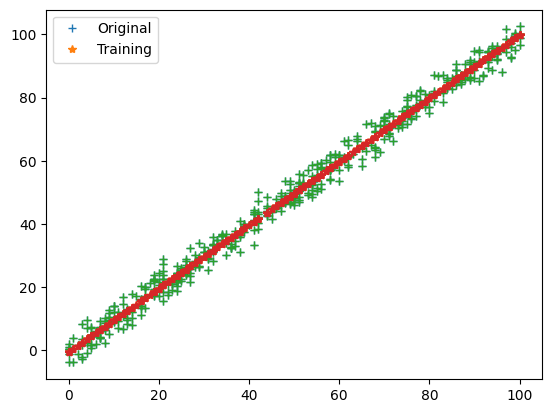

Iteration = 19, Loss = <function cost_function at 0x7f7a363756c0>


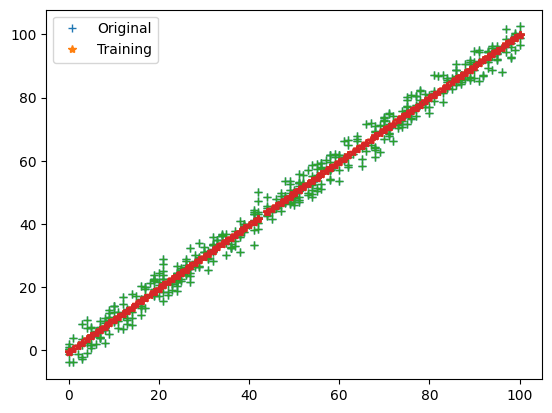

Iteration = 20, Loss = <function cost_function at 0x7f7a363756c0>


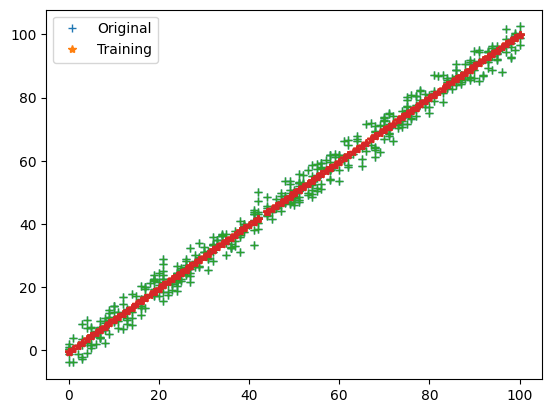

In [121]:
parameters,loss = train(train_input,train_output,0.0001,20)